# PLS - (Partial Least Squares) (Kısmi En Küçük Kareler)

## Teori

Değişkenler daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır.  

![image.png](imagee17.png)

PCR'a benzer ama değişkenler arasındaki ilişkiyi de dikkate alarak daha iyi tahmin yapar. Özellikle multicollinearity (çoklu doğrusal bağlantı) varsa PCR'dan daha iyi performans gösterebilir.

![image.png](imagee18.png)

![image.png](imagee19.png)

## Model

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [2]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [3]:
pls_model = PLSRegression(n_components=6).fit(X_train, y_train)

In [4]:
pls_model.coef_ # Bilesenleri 6 girmemize ragmen 19 adet katsayi verdi.

array([[-7.11344810e-01,  3.43498414e+00, -1.06653548e+01,
        -4.24244651e-01,  2.38048091e+00,  3.65280127e+00,
        -1.32771506e+01, -6.17657304e-03,  1.17287106e-01,
         1.68483991e+00,  1.34809107e-01,  3.83409700e-01,
        -4.20602632e-01,  3.39975859e-01, -1.75662699e-01,
         1.88153104e+00,  2.39350716e+01, -9.27129651e+01,
         9.10866540e+00]])

In [5]:
pls_model.x_weights_.shape

(19, 6)

![image.png](imagee20.png)

![image.png](imagee21.png)

MLR (Multiple Linear Regression)'da bileşen yok, direkt tüm özellikler kullanılır.  

**Bileşenler bizim veri setimizdeki sütunlar mı?**  
Hayır. Bileşenler, veri setindeki sütunlardan türetilen yeni değişkenlerdir. Özelliklerin lineer kombinasyonlarıdır.









## Tahmin

In [6]:
pls_model

PLSRegression(n_components=6)

In [7]:
y_pred = pls_model.predict(X_train)

In [8]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

303.58494711188786


In [9]:
r2_score(y_train, y_pred)

0.5290293383874656

In [10]:
y_pred = pls_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(370.85502038780146)

In [12]:
df.Salary.mean()

np.float64(535.9258821292775)

## Model Tuning

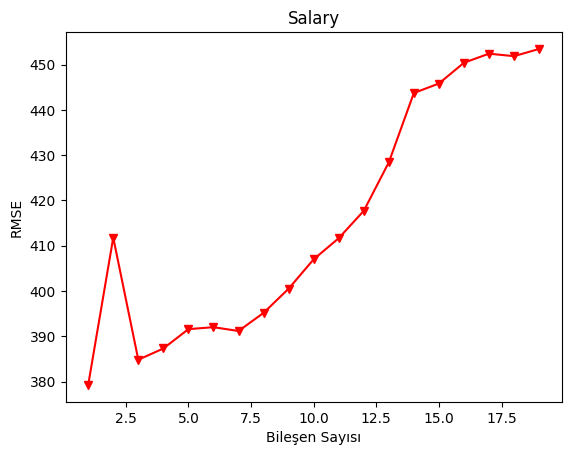

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

#Hata hesaplamak için döngü
RMSE = []
for i in np.arange(1, X_test.shape[1] + 1):
    pts = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pts, X_test, y_test, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_test.shape[1] + 1), np.array(RMSE), '-v', c = 'r')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

Burada en optimum değerin 1 olduğunu görüyoruz. Modeli tekrar oluşturuyoruz.

In [17]:
pls_model = PLSRegression(n_components=1).fit(X_train, y_train)

In [18]:
y_pred = pls_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Goruldugu gibi ilk test hatasindan daha dusuk bir deger cikti:

np.float64(357.1954972270887)